In [1]:
import loadDataForSKtime
import LSTMmodel

loader = loadDataForSKtime.PatientTimeSeriesLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ['HR', 'Temp', 'PTT', 'Platelets', 'WBC', 'Glucose'])
df = loader.load_data_LSTM(200)

y_train, y_test, X_train, X_test = loader.properly_split(df, ['HR'], ['Temp', 'PTT', 'Platelets', 'WBC', 'Glucose'])


<class 'list'>
Patient 1: Dropping — constant columns found
Patient 2: Less than 30 time points — skipping.
Patient 3: Dropping — constant columns found
Patient 4: Less than 30 time points — skipping.
Patient 5: Dropping — constant columns found
Patient 6: Less than 30 time points — skipping.
Patient 8: Dropping — constant columns found
Patient 10: Less than 30 time points — skipping.
Patient 11: Dropping — constant columns found
Patient 12: Less than 30 time points — skipping.
Patient 13: Dropping — constant columns found
Patient 15: Less than 30 time points — skipping.
Patient 16: Less than 30 time points — skipping.
Patient 17: Dropping — constant columns found
Patient 18: Dropping — constant columns found
Patient 19: Dropping — constant columns found
Patient 20: Less than 30 time points — skipping.
Patient 21: Dropping — constant columns found
Patient 22: Less than 30 time points — skipping.
Patient 23: Less than 30 time points — skipping.
Patient 25: Dropping — constant columns fo

C:\Users\emily\Documents\DissertationProject\loadDataForSKtime.py:268: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_target_df["Patient_ID"] = new_patient_id
C:\Users\emily\Documents\DissertationProject\loadDataForSKtime.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_target_df["ICULOS"] = train_df.index
C:\Users\emily\Documents\DissertationProject\loadDataForSKtime.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [2]:
from sktime.transformations.series.feature_selection import FeatureSelection

transformer = FeatureSelection(method="feature-importances", n_columns=3)


In [8]:
Xt = transformer.fit_transform(X_train, y_train)

In [9]:
Xt

Temp  Platelets  Glucose   PTT   WBC
Patient_ID ICULOS                                       
0          0       37.56       26.0    263.0   NaN   NaN
           1       37.56       26.0    263.0   NaN   NaN
           2       37.56       26.0    263.0   NaN   NaN
           3       37.56       26.0    263.0   NaN   NaN
           4       37.83       26.0    263.0   NaN   NaN
...                  ...        ...      ...   ...   ...
9          19        NaN      227.0      NaN  93.9   9.0
           20        NaN      227.0      NaN  93.9   9.0
           21        NaN      227.0      NaN  93.9   9.0
           22        NaN      102.0      NaN  43.0  16.2
           23        NaN      102.0      NaN  43.0  16.2

[240 rows x 5 columns]

In [4]:
y_train.index

HR
Patient_ID ICULOS       
0          0       155.5
           1       155.5
           2       146.0
           3       154.0
           4       122.0
...                  ...
9          22      101.0
           23       95.5
           24       97.0
           25       95.0
           26       94.0

[270 rows x 1 columns]

In [3]:
y_test

HR
Patient_ID ICULOS       
0          27      117.0
           28      118.0
           29      123.0
1          27       90.0
           28       96.0
           29       90.0
2          27      104.0
           28      110.0
           29      110.0
3          27       81.0
           28       85.0
           29       82.0
4          27      115.0
           28      114.0
           29      117.0
5          27       87.0
           28       89.0
           29       89.0
6          27       69.5
           28       66.0
           29       69.0
7          27       99.0
           28       99.0
           29       98.0
8          27      128.0
           28      125.0
           29      119.5
9          27       93.0
           28       91.0
           29       89.0

In [4]:
X_train

Temp   PTT  Platelets   WBC  Glucose
Patient_ID ICULOS                                       
0          0       36.00  46.4       64.0   8.9    123.0
           1       36.00  46.4       64.0   8.9    123.0
           2       36.00  46.4       64.0   8.9    123.0
           3       36.00  40.8      114.0   3.9    117.5
           4       36.00  40.8      114.0   3.9    102.0
...                  ...   ...        ...   ...      ...
1          42      36.22  42.8      126.0  11.4    179.0
           43      36.22  42.8      126.0  11.4    179.0
           44      36.22  42.8      126.0  11.4    179.0
           45      36.22  42.8      126.0  11.4    179.0
           46      36.22  42.8      126.0  11.4    179.0

[94 rows x 5 columns]

In [5]:
X_test

Temp   PTT  Platelets   WBC  Glucose
Patient_ID ICULOS                                       
0          47      37.33  32.0       93.0  10.9    111.0
           48      37.33  32.0       93.0  10.9    123.0
           49      37.61  32.0       93.0  10.9    123.0
1          47      36.22  42.8      126.0  11.4    179.0
           48      37.00  42.8      126.0  11.4    179.0
           49      37.00  42.8      126.0  11.4    179.0

In [3]:
HR_LSTM = LSTMmodel.LSTMforecaster(['HR'], y_train=y_train, exogenous=['Temp', 'PTT', 'Platelets', 'WBC', 'Glucose'], y_test=y_test, X_train=X_train, X_test=X_test)

In [4]:
HR_LSTM.fit()

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.


In [5]:
forecasts = HR_LSTM.predict()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Model is fitted. Generating forecasts...


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [6]:
forecasts

HR
Patient_ID ICULOS            
0          24      123.354469
           25      123.946075
           26      124.919571
           27      125.021011
           28      124.930595
           29      124.748375
1          24       93.483299
           25       93.198624
           26       92.833031
           27       92.412392
           28       92.113220
           29       91.875076
2          24       94.379860
           25       94.182259
           26       93.545326
           27       93.231232
           28       92.888466
           29       92.564087
3          24       99.794487
           25       99.301300
           26       99.042229
           27      101.035378
           28      101.180641
           29      101.414505
4          24      116.667320
           25      116.465141
           26      116.367226
           27      116.399994
           28      116.370750
           29      116.449875
5          24       90.737984
           25       90.771400
           26       90.713806
           27       90.652489
           28       90.605446
           29       90.540001
6          24       82.173973
           25       80.961975
           26       79.217552
           27       78.610512
           28       77.612389
           29       77.137970
7          24       96.897926
           25       97.227608
           26       97.199089
           27       97.079079
           28       96.941719
           29       96.339287
8          24      101.743851
           25       98.344765
           26       95.440735
           27       93.663063
           28       92.426285
           29       89.815865
9          24       70.179016
           25       70.350784
           26       70.409782
           27       70.390488
           28       70.241386
           29       70.123016

In [12]:
from sktime.distances import dtw_distance
import numpy as np

dtw_list = []

for pid in y_test.index.get_level_values("Patient_ID").unique():
    for feature in y_test.columns:
        timeseries = y_test.loc[pid, feature]
        forecasted_timeseries = forecasts.loc[pid, feature]
        
        x = np.array(timeseries)
        y = np.array(forecasted_timeseries)
        
        dtw_val = dtw_distance(x, y)
        dtw_list.append(dtw_val)

average_dtw = np.mean(dtw_list)
print("Average DTW:", average_dtw)

Average DTW: 1040.4010996891477


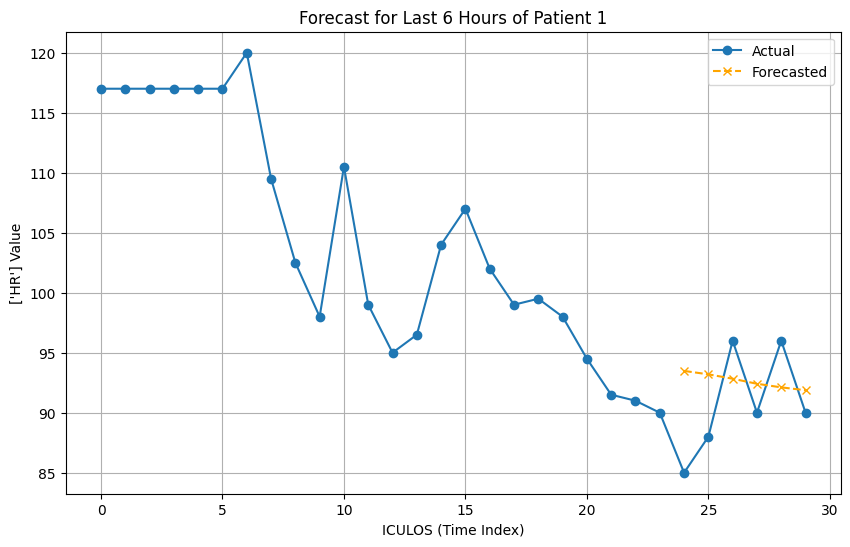

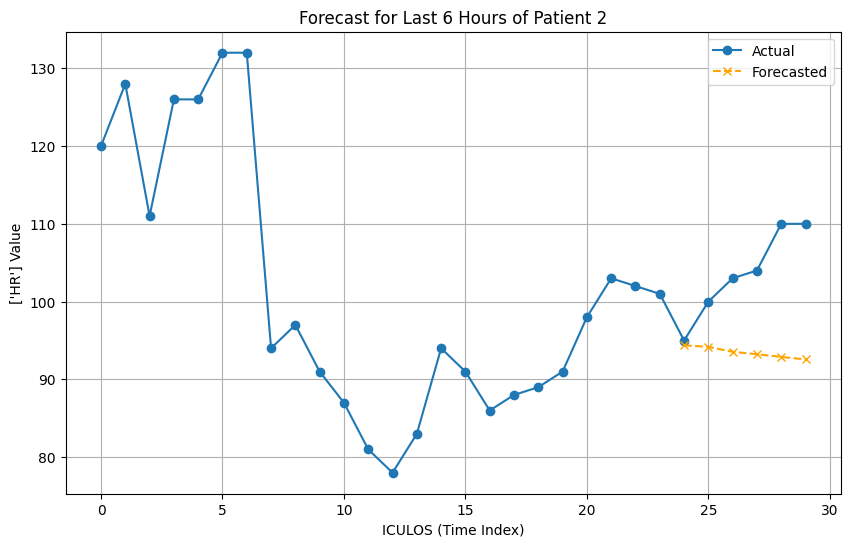

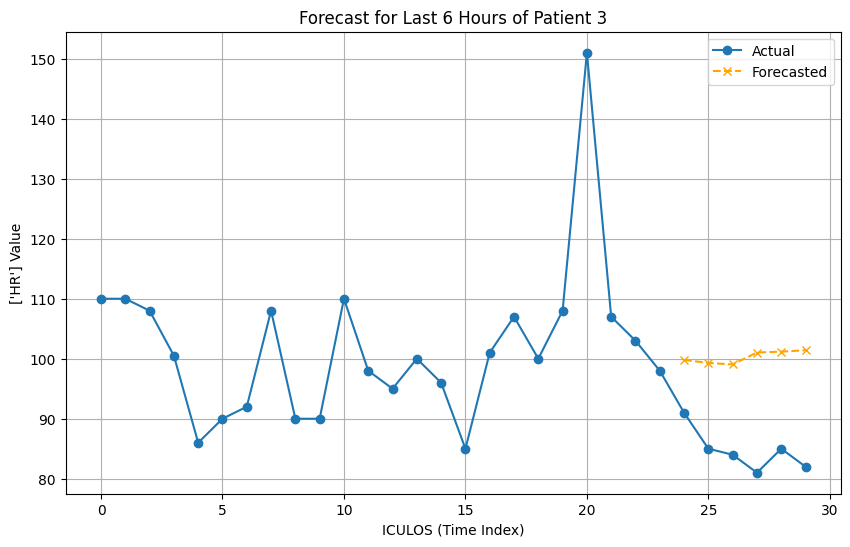

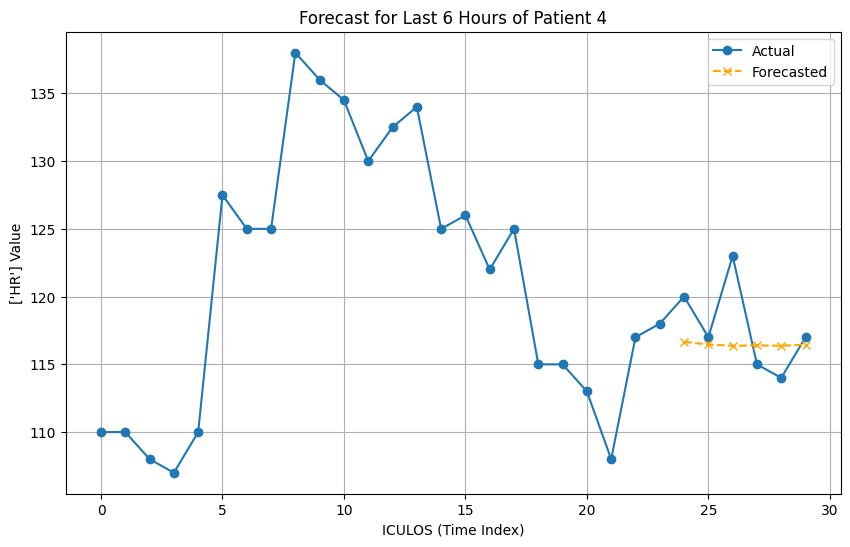

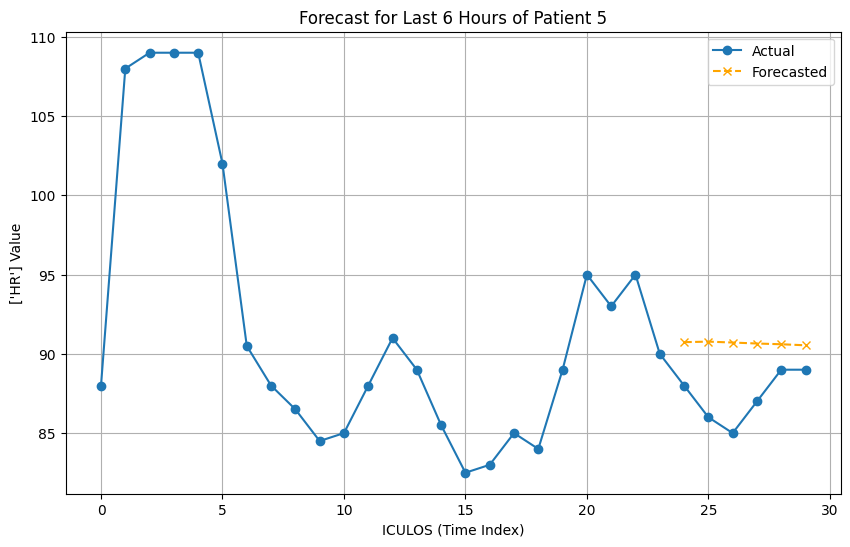

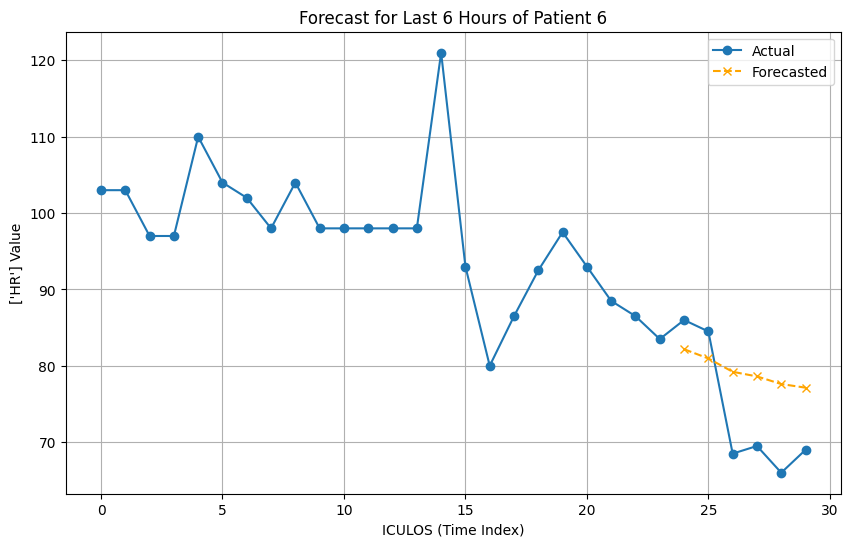

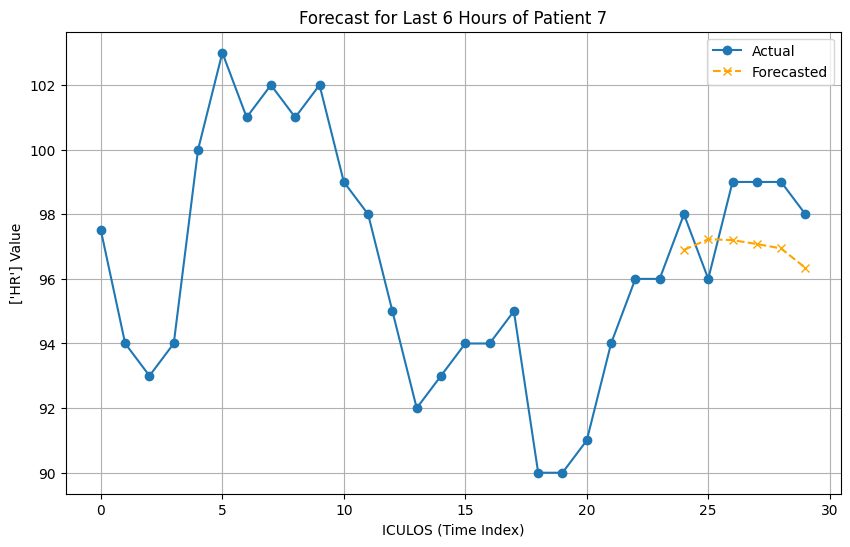

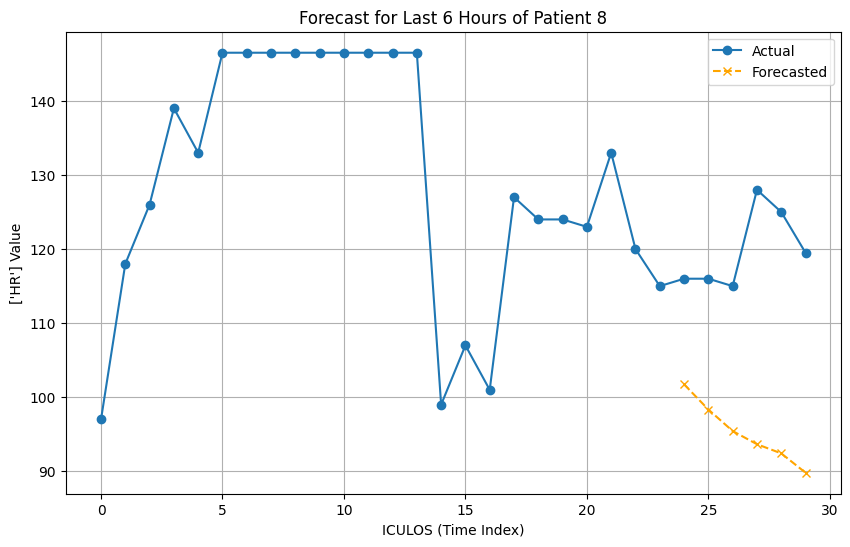

In [9]:
for patient_id in range(1, 9):
    if patient_id in forecasts.index.get_level_values("Patient_ID"):
        HR_LSTM.plot_forecast(forecasts, patient_id=patient_id, steps=6)


In [2]:
y_train, y_test, X_train, X_test = loader.properly_split(df, ['HR', 'Temp', 'PTT', 'Platelets', 'WBC', 'Glucose'], [])

Patient 2: Dropping — constant columns found
Patient 3: Dropping — constant columns found
Patient 4: Dropping — constant columns found
Patient 5: Dropping — constant columns found
Patient 6: Dropping — constant columns found
Patient 8: Dropping — constant columns found
Patient 9: Dropping — constant columns found
Patient 10: Dropping — constant columns found
Patient 11: Dropping — constant columns found
Patient 15: Dropping — constant columns found
Patient 17: Dropping — constant columns found
Patient 19: Dropping — constant columns found
Patient 20: Dropping — constant columns found
Patient 21: Dropping — constant columns found
Patient 24: Dropping — constant columns found
Patient 25: Dropping — constant columns found
Patient 26: Dropping — constant columns found
Patient 27: Dropping — constant columns found
Patient 28: Dropping — constant columns found


C:\Users\emily\Documents\DissertationProject\loadDataForSKtime.py:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_exogenous_df["Patient_ID"] = new_patient_id
C:\Users\emily\Documents\DissertationProject\loadDataForSKtime.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_exogenous_df["ICULOS"] = train_df.index
C:\Users\emily\Documents\DissertationProject\loadDataForSKtime.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [3]:
y_train

HR   Temp   PTT  Platelets   WBC  Glucose
Patient_ID ICULOS                                              
0          0       155.5  37.56  26.6       26.0   9.3    263.0
           1       155.5  37.56  26.6       26.0   9.3    263.0
           2       146.0  37.56  26.6       26.0   9.3    263.0
           3       154.0  37.56  26.6       26.0   9.3    263.0
           4       122.0  37.83  26.6       26.0   9.3    263.0
...                  ...    ...   ...        ...   ...      ...
9          19       68.0  35.83  93.9      227.0   9.0    109.0
           20       68.0  35.83  93.9      227.0   9.0    175.0
           21       68.0  35.83  93.9      227.0   9.0    171.0
           22      101.0  35.83  43.0      102.0  16.2    148.0
           23       95.5  35.70  43.0      102.0  16.2    133.0

[240 rows x 6 columns]

In [4]:
y_test

HR   Temp    PTT  Platelets   WBC  Glucose
Patient_ID ICULOS                                               
0          24      121.0  38.06   26.3       54.0   9.5     71.0
           25      119.0  38.06   26.3       54.0   9.5     71.0
           26      121.0  38.06   27.1       47.0   8.8    252.0
           27      117.0  38.06   27.1       47.0   8.8    252.0
           28      118.0  38.06   27.1       47.0   8.8    252.0
           29      123.0  38.06   27.1       47.0   8.8    252.0
1          24       85.0  37.00   31.0      137.0  12.1     96.0
           25       88.0  37.17   31.0      137.0  12.1     96.0
           26       96.0  37.28   31.0      137.0  12.1     96.0
           27       90.0  37.50   31.0      137.0  12.1     96.0
           28       96.0  37.50   31.0      137.0  12.1     96.0
           29       90.0  37.44   31.0      137.0  12.1     96.0
2          24       95.0  37.08   30.0      120.0   8.0    125.0
           25      100.0  37.08   30.0      120.0   8.0    125.0
           26      103.0  36.28   30.0      120.0   8.0    125.0
           27      104.0  36.28   30.0      120.0   8.0    125.0
           28      110.0  36.28   30.0      120.0   8.0    125.0
           29      110.0  36.28   30.0      120.0   8.0    125.0
3          24       91.0  37.00   35.8      137.0   7.8     94.0
           25       85.0  37.17   35.8      137.0   7.8     94.0
           26       84.0  37.17   35.8      137.0   7.8     94.0
           27       81.0  37.17   30.9      143.0   6.5    115.0
           28       85.0  37.17   30.9      143.0   6.5    115.0
           29       82.0  37.00   30.9      143.0   6.5    115.0
4          24      120.0  37.80  150.0       60.0  12.5    136.0
           25      117.0  37.80  150.0       60.0  12.5    136.0
           26      123.0  37.80  150.0       60.0  12.5    136.0
           27      115.0  37.90  150.0       60.0  12.5    126.0
           28      114.0  37.90  150.0       60.0  12.5    126.0
           29      117.0  38.00  150.0       60.0  12.5    126.0
5          24       88.0  38.00   37.2      133.0   6.8    155.0
           25       86.0  38.10   37.2      133.0   6.8    155.0
           26       85.0  38.20   37.2      133.0   6.8    155.0
           27       87.0  38.30   37.2      133.0   6.8    155.0
           28       89.0  38.30   37.2      133.0   6.8    109.0
           29       89.0  38.30   37.2      133.0   6.8    109.0
6          24       86.0  37.30   51.4      110.0  17.2    116.0
           25       84.5  37.20   51.4      110.0  17.2    116.0
           26       68.5  36.90   34.0      115.0  17.2    102.0
           27       69.5  36.90   34.0      115.0  17.2    102.0
           28       66.0  36.80   34.0      115.0  17.2    102.0
           29       69.0  36.95   34.0      115.0  17.2     86.0
7          24       98.0  37.00   31.3      383.0  14.5    107.0
           25       96.0  37.28   31.3      383.0  14.5    107.0
           26       99.0  37.28   31.3      383.0  14.5    107.0
           27       99.0  37.28   31.3      383.0  14.5    107.0
           28       99.0  37.28   31.3      383.0  14.5    107.0
           29       98.0  36.78   31.3      383.0  14.5    107.0
8          24      116.0  37.61   26.1      210.0   9.5    151.5
           25      116.0  37.56   26.1      233.0  10.7    160.0
           26      115.0  37.56   26.1      233.0  10.7    160.0
           27      128.0  37.56   26.1      233.0  10.7    160.0
           28      125.0  37.56   26.1      233.0  10.7    160.0
           29      119.5  37.28   26.1      233.0  10.7    160.0
9          24       97.0  36.40   43.0      102.0  16.2    133.0
           25       95.0  36.95   43.0      102.0  16.2    133.0
           26       94.0  37.30   43.0      102.0  16.2    106.0
           27       93.0  37.29   37.6      114.0  16.2    132.0
           28       91.0  37.50   37.6      114.0  16.2    117.0
           29       89.0  37.75   37.6      114.0  16.2  

In [5]:
model2 = LSTMmodel.LSTMforecaster(target=['HR','Temp', 'PTT', 'Platelets', 'WBC', 'Glucose'], y_train=y_train, y_test=y_test)

In [6]:
model2.fit()

C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:138: UserWarning: Input size too small. Automatically setting input size to 3 * horizon = 18
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:146: UserWarning: Inference input size too small. Automatically setting inference input size to input_size = 18
  warnings.warn(
Seed set to 1
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\models\lstm.py:161: UserWarning: context_size is deprecated and will be removed in future versions.
  warnings.warn(
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\neuralforecast\common\_base_model.py:535: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
GPU available: False, used: False
TPU ava

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=10` reached.


In [7]:
forecasts2 = model2.predict()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Model is fitted. Generating forecasts...


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

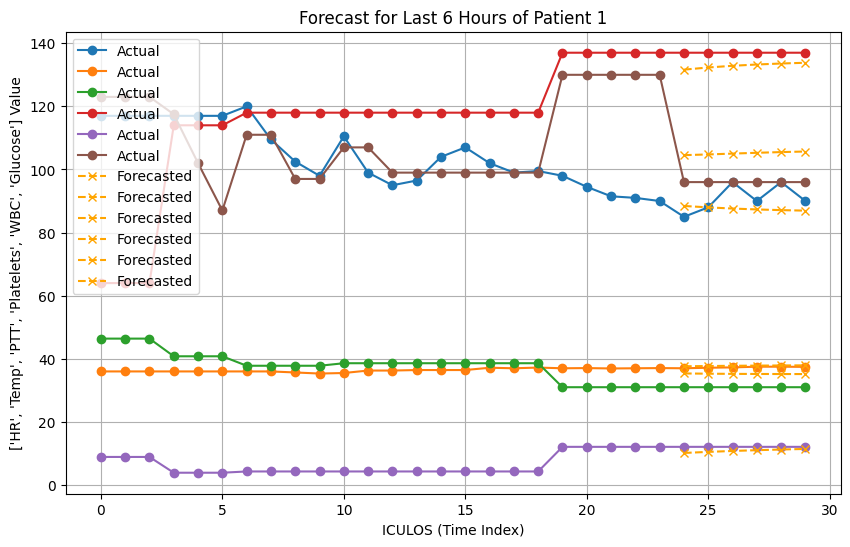

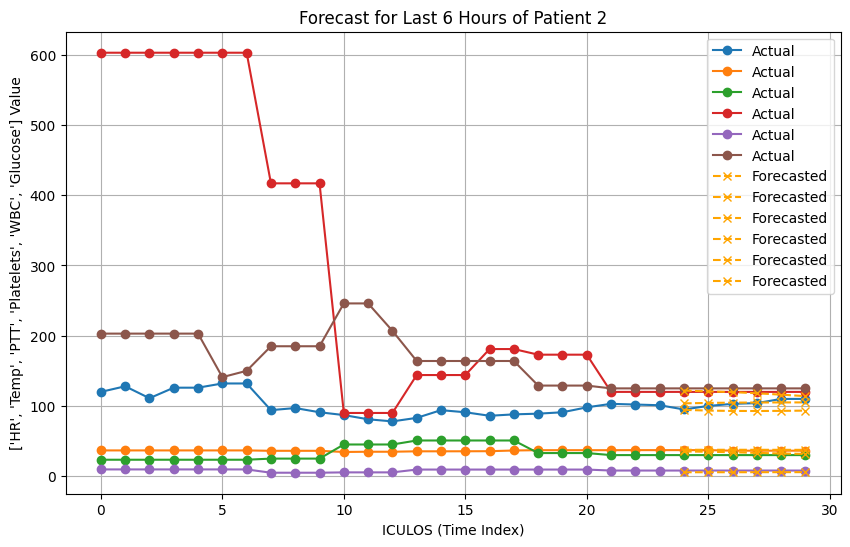

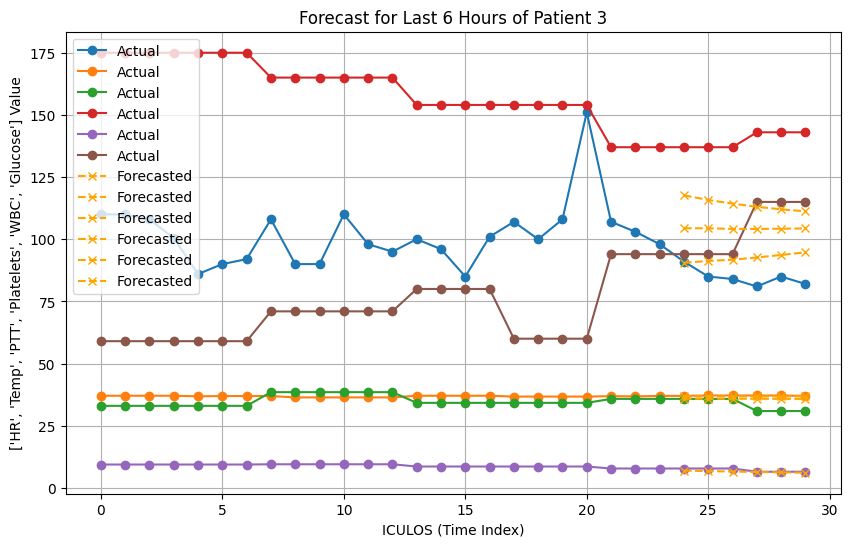

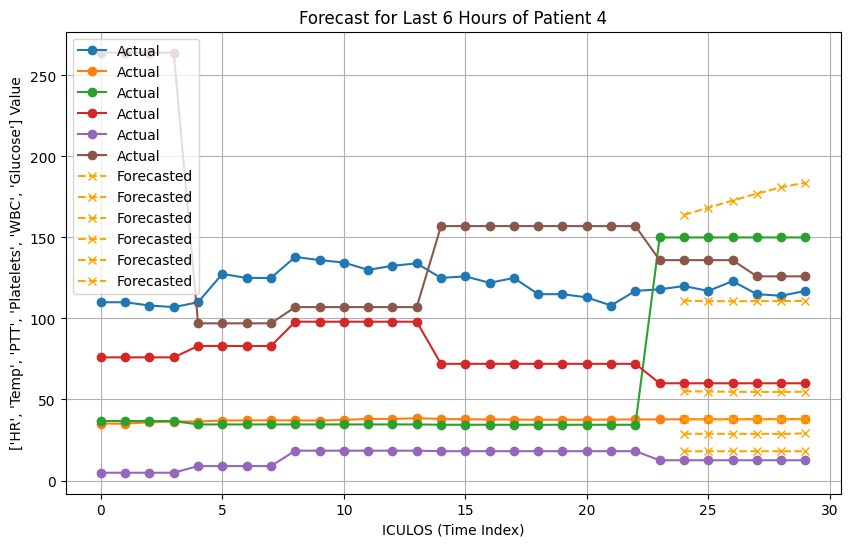

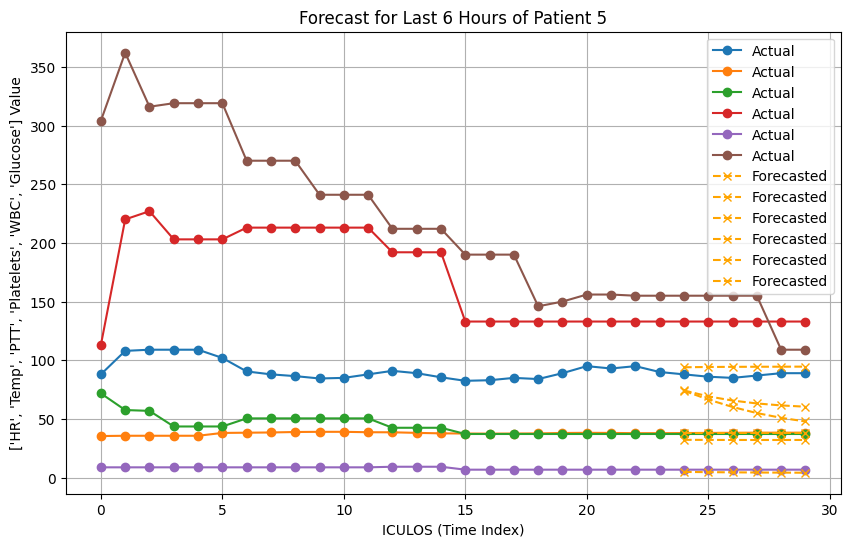

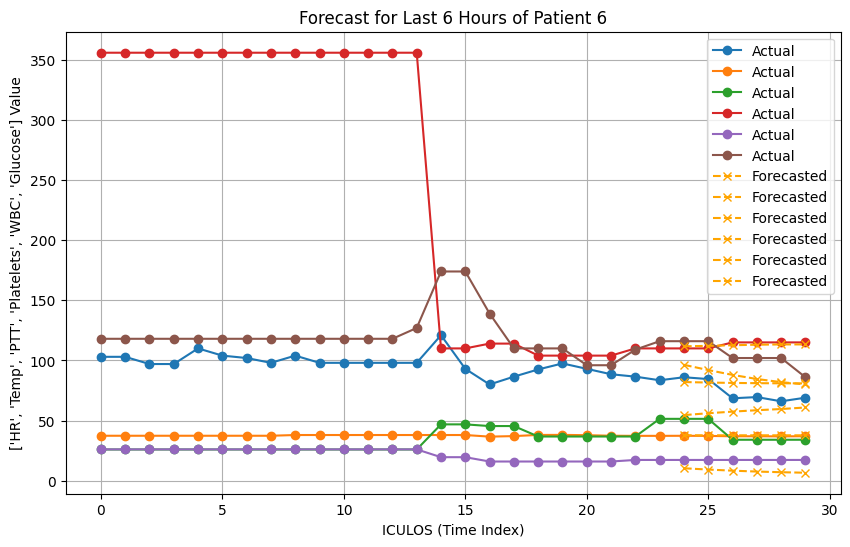

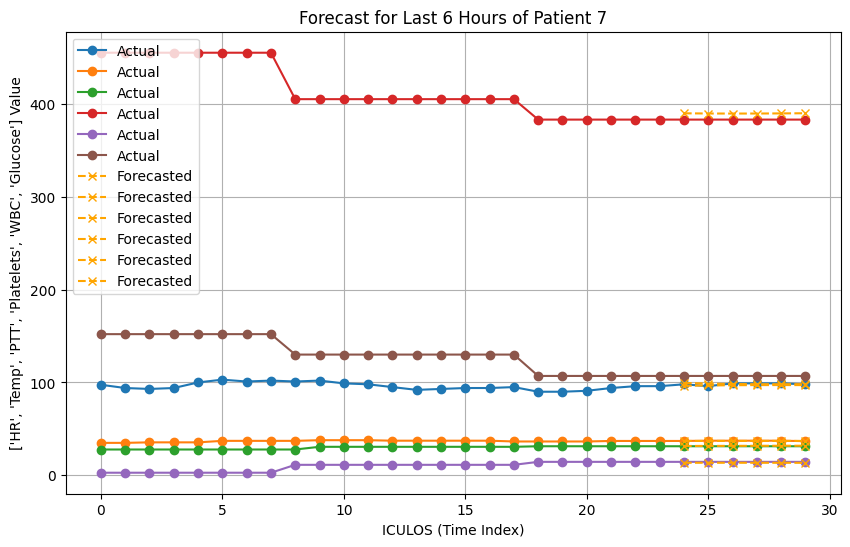

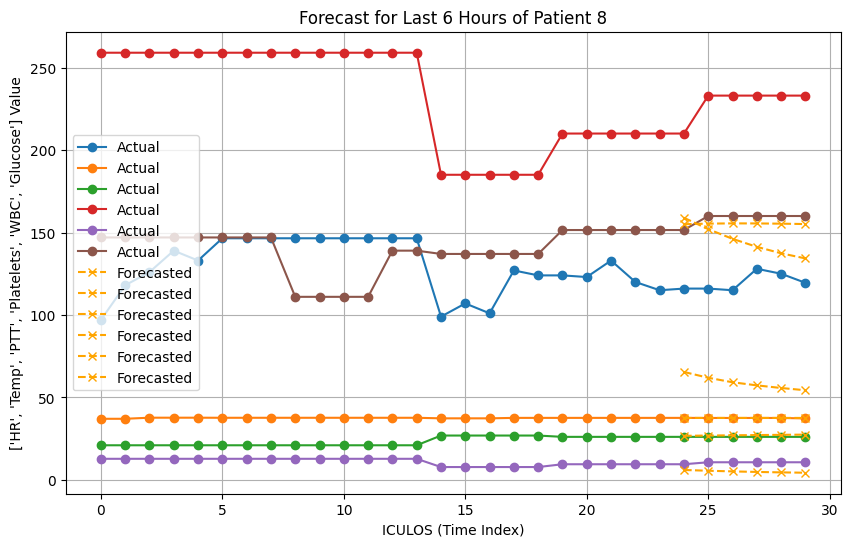

In [8]:
for patient_id in range(1, 9):
    if patient_id in forecasts2.index.get_level_values("Patient_ID"):
        model2.plot_forecast(forecasts2, patient_id=patient_id, steps=6)